In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from numpy import set_printoptions
from numpy import sqrt
from numpy import asarray
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import load_model

In [10]:
apple=pd.read_csv('res/Apple15-23.csv',engine='python',sep=',')
apple['Date'] = pd.to_datetime(apple.Date,format='%Y-%m-%d')

In [11]:
apple.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1008,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719700,234428400
1017,2019-01-17,38.549999,39.415001,38.314999,38.965000,37.550739,119284800
951,2018-10-11,53.630001,54.875000,53.080002,53.612499,51.486946,212497600
820,2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200
1345,2020-05-07,75.805000,76.292503,75.492500,75.934998,74.454681,115215200


In [12]:
apple.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2076,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2.076000e+03
mean,2019-02-15 08:56:52.716762880,75.203591,76.074992,74.376458,75.263381,73.559775,1.298945e+08
min,2015-01-02 00:00:00,22.500000,22.917500,22.367500,22.584999,20.883034,3.519590e+07
25%,2017-01-24 18:00:00,32.725000,33.013749,32.474998,32.675625,29.895256,8.444012e+07
50%,2019-02-17 00:00:00,49.766250,50.168751,49.420001,49.810000,48.252117,1.106320e+08
75%,2021-03-10 06:00:00,127.820000,129.210003,126.237499,127.534998,126.127844,1.543948e+08
max,2023-03-31 00:00:00,182.630005,182.940002,179.119995,182.009995,180.683868,6.488252e+08
std,NaN,49.859221,50.531405,49.223579,49.907444,50.411060,6.777068e+07


In [13]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2076 non-null   datetime64[ns]
 1   Open       2076 non-null   float64       
 2   High       2076 non-null   float64       
 3   Low        2076 non-null   float64       
 4   Close      2076 non-null   float64       
 5   Adj Close  2076 non-null   float64       
 6   Volume     2076 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 113.7 KB


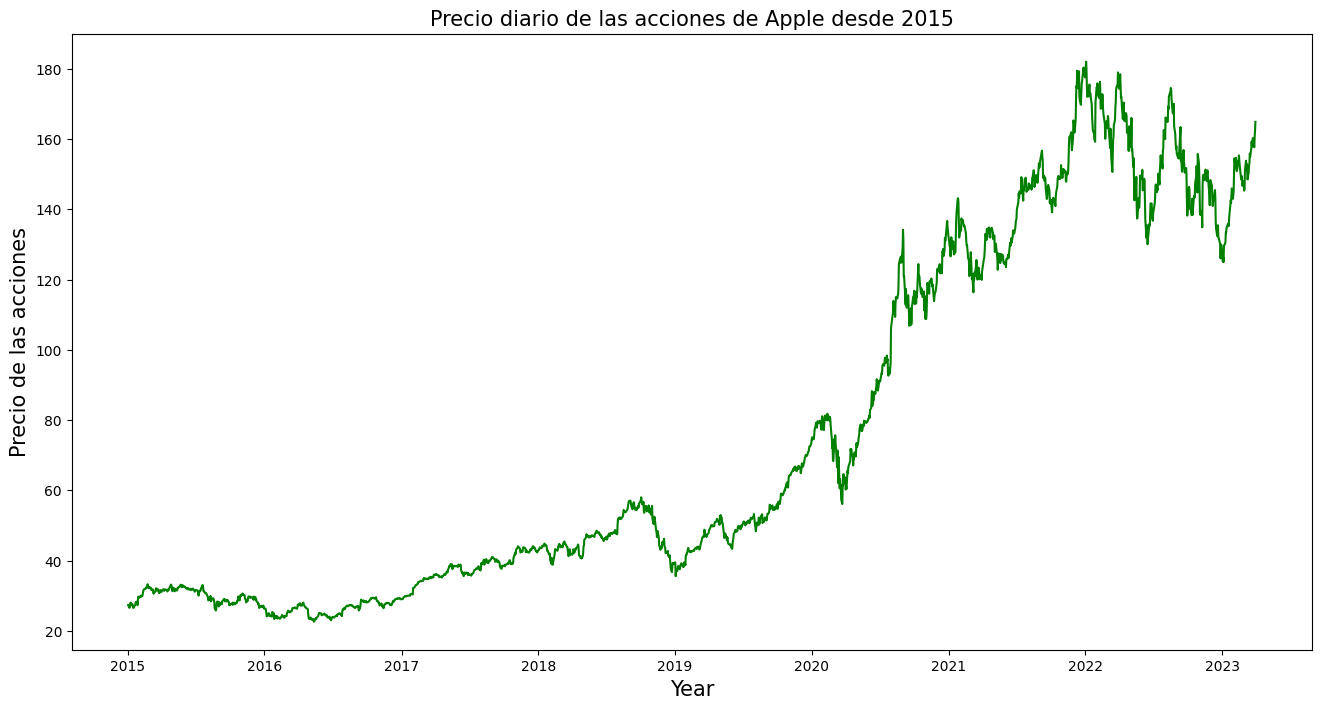

In [14]:
x_data=apple['Date']
y_data=apple['Close']
plt.figure(figsize=(16,8))
plt.plot(x_data,y_data,'g')
plt.xlabel('Year',size=15)
plt.ylabel('Precio de las acciones',size=15)
plt.title('Precio diario de las acciones de Apple desde 2015',size=15)
plt.show()

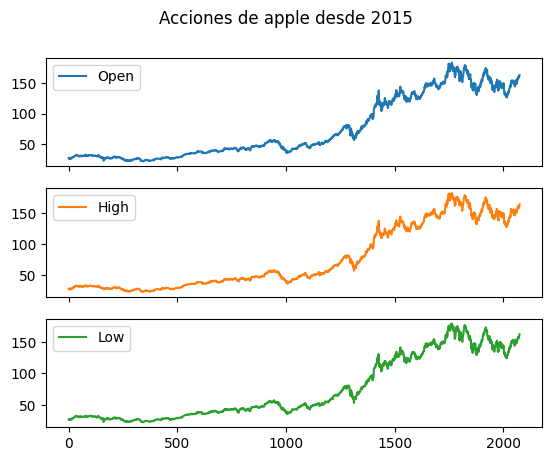

In [15]:
grafica=pd.DataFrame(apple,columns=['Open','High','Low'])
grafica.plot(title='Acciones de apple desde 2015',subplots=True)
plt.show()

In [16]:
df=pd.DataFrame(apple,columns=['Date','Open','High','Low','Volume','Adj Close','Close'])
df['Date']=LabelEncoder().fit_transform(df['Date'])
df.sample(5)

,Date,Open,High,Low,Volume,Adj Close,Close
1878,1878,130.070007,133.080002,129.809998,134520300,130.959976,131.559998
895,895,48.112499,48.415001,48.012501,74791600,46.175110,48.250000
1098,1098,46.567501,47.937500,46.505001,106178800,46.372780,47.730000
989,989,42.939999,43.695000,42.605000,172393600,42.094601,43.680000
1246,1246,67.864998,68.824997,67.732498,133587600,67.286842,68.787498


## Modelo: Linear Regression

In [17]:
X=df[['Date','Open','High','Low','Volume','Adj Close']]
Y=df['Close']
print('X shape:',X.shape)
print('Y shape:',Y.shape)

X shape: (2076, 6)
Y shape: (2076,)


In [18]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=1,test_size=0.2)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', Y_train.shape)
print('y_test dimension= ', Y_test.shape)

X_train dimension=  (1660, 6)
X_test dimension=  (416, 6)
y_train dimension=  (1660,)
y_test dimension=  (416,)


In [19]:
linreg=linear_model.LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [20]:
linreg.score(X_test,Y_test)

0.9999721480233519

In [21]:
pred_linreg=linreg.predict(X_test)
pred_linreg

array([ 42.11117778,  24.30782702,  32.42137267,  50.97785571,
        56.21658004,  38.1638409 ,  43.52293647,  50.90138641,
        92.62294705,  79.37554121,  79.34726983,  26.56938457,
       148.49211058, 134.14609052,  24.64879505,  32.21383164,
        24.05242551,  55.05464148,  52.18147695, 117.89458335,
        40.5439853 ,  73.26058768, 129.605777  ,  34.83543345,
        28.05358457,  26.42312391,  24.03524923,  39.15304649,
        31.69838129,  83.99375351,  28.32137175, 165.6154739 ,
        50.3951483 ,  37.47859504,  31.75147714,  49.1516621 ,
        45.22023213,  29.95946109,  30.75474741,  39.46349241,
        44.41486341,  48.07522328,  80.3470415 ,  59.91129254,
       136.80076373,  35.09582766, 178.97024022,  27.4760148 ,
        47.76435715,  26.52357144,  28.9992114 ,  40.11791279,
       136.67674322,  34.88397549,  38.3325667 , 145.84494997,
       144.31176167,  38.73739905, 112.00567714,  34.63539249,
        42.45481591,  58.70514285,  28.4604067 ,  27.78

In [22]:
columns=['Date','Open','High','Low','Volume','Adj Close']
print(linreg.intercept_)
print(list(zip(columns,linreg.coef_)))

2.2941071649143083
[('Date', -0.0012273740052998346), ('Open', -0.09079528247403204), ('High', 0.10658161092085021), ('Low', 0.13667137766683593), ('Volume', 3.1253183374602145e-10), ('Adj Close', 0.8530564745241281)]


In [23]:
#Mean Absolute Error
mae=metrics.mean_absolute_error(Y_test,pred_linreg)
mae

0.21485814614085674

In [24]:
#Mean Squared Error
mse=metrics.mean_squared_error(Y_test,pred_linreg,squared=True)
mse

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.06915673822478033

In [25]:
rmse=metrics.mean_squared_error(Y_test,pred_linreg,squared=False)
rmse

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.2629766876070583

In [26]:
predicciones=pd.DataFrame(Y_test)
predicciones['prediccion']=pred_linreg
predicciones['Date']=X_test['Date']
grafica=predicciones.sort_values(by='Date',ascending=True)

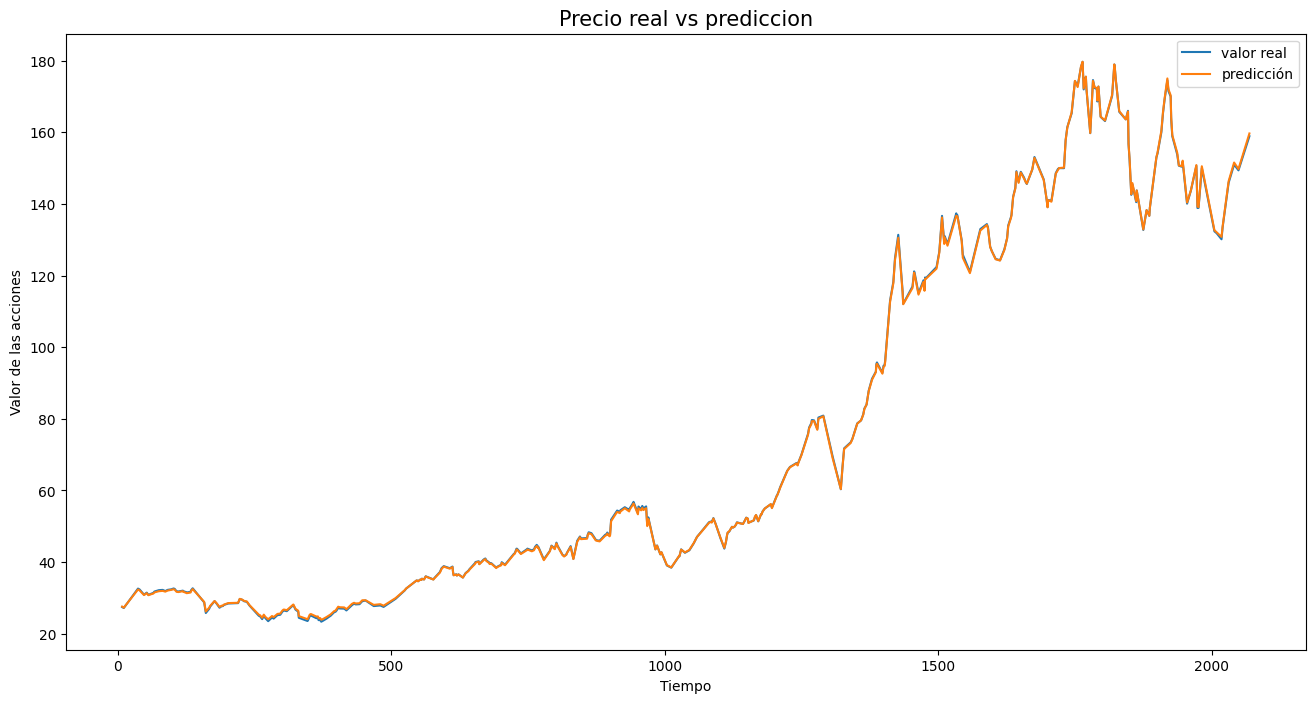

In [27]:
X_data=grafica['Date']
Y_data=grafica['Close']
Y_data1=grafica['prediccion']
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=10)
plt.ylabel('Valor de las acciones',size=10)
plt.title('Precio real vs prediccion',size=15)
plt.legend(loc='best')
plt.show()

## Predicciones de los dias 3, 4, 5 y 6 de abril 

In [28]:
abril_3=[819,164.270004,166.289993,164.220001,56976200,166.169998]
abril_4=[820,166.600006,166.839996,165.110001,46278300,165.630005]
abril_5=[821,164.740005,165.050003,161.800003,51511700,163.759995]
abril_6=[822,162.429993,164.960007,162.000000,45390100,164.660004]

In [29]:
pred_3abril=linreg.predict([abril_3])
pred_4abril=linreg.predict([abril_4])
pred_5abril=linreg.predict([abril_5])
pred_6abril=linreg.predict([abril_6])
print('prediccion 3 abril:',pred_3abril)
print('prediccion 4 abril:',pred_4abril)
print('prediccion 5 abril:',pred_5abril)
print('prediccion 6 abril:',pred_6abril)

prediccion 3 abril: [168.31177509]
prediccion 4 abril: [167.8152643]
prediccion 5 abril: [165.74616539]
prediccion 6 abril: [166.73826346]


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
true=[166.169998,165.630005,163.759995,164.660004]
pred=[pred_3abril,pred_4abril,pred_5abril,pred_6abril]

In [31]:
mae=metrics.mean_absolute_error(true,pred)
mae

2.0978665597412416

In [32]:
mse=metrics.mean_squared_error(true,pred,squared=True)
mse

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4.406650627444979

In [33]:
rmse=metrics.mean_squared_error(true,pred,squared=False)
rmse

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.0992023788679783

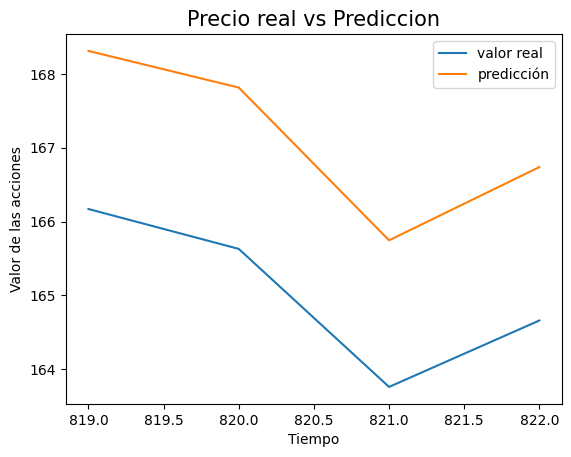

In [34]:
X_data=[abril_3[0],abril_4[0],abril_5[0],abril_6[0]]
Y_data=true
Y_data1=pred
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=10)
plt.ylabel('Valor de las acciones',size=10)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

# Redes Recurrentes, LSTM

In [35]:
rnn=pd.DataFrame(df,columns=['Close'],index=df['Date'])

In [36]:
def split_sequence(sequence, steps):
    x, y = list(), list()
    for i in range(len(sequence)):

        end_ix = i + steps
    
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return asarray(x), asarray(y)

In [37]:
values=rnn.values.astype('float32')
steps=6

x,y=split_sequence(values,steps)

x=x.reshape((x.shape[0],x.shape[1],1))
n_test=100
            
x_train, x_test, y_train, y_test = x[:-n_test], x[-n_test:], y[:-n_test], y[-n_test:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1970, 6, 1) (100, 6, 1) (1970, 1) (100, 1)


## LSTM 100 capas, loss=mse

In [44]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compilar
model.compile(optimizer='adam', loss='mse')
# entrenamiento
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
model.save('res/model1.keras')

Epoch 1/150


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1949.8116 - val_loss: 23.4610
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.4500 - val_loss: 20.3502
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5974 - val_loss: 16.2210
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9558 - val_loss: 14.9714
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.5006 - val_loss: 14.4184
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.2348 - val_loss: 13.8941
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.8338 - val_loss: 13.3619
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9307 - val_loss: 12.8051
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9342 - val_loss: 12.2961
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1458 - val_loss: 15.8716
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.9487 - val_loss: 12.8877
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step 

In [46]:
model1 = load_model('res/model1.keras')
error = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

MSE: 9.722, RMSE: 3.118


In [47]:
lstm_pred = model1.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: {lstm_pred}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted: [[141.689]
 [141.826]
 [141.779]
 [137.069]
 [147.862]
 [150.234]
 [149.062]
 [150.809]
 [150.404]
 [152.432]
 [152.963]
 [149.968]
 [151.999]
 [152.949]
 [150.143]
 [146.475]
 [143.858]
 [150.203]
 [150.135]
 [149.233]
 [148.16 ]
 [145.133]
 [143.45 ]
 [145.01 ]
 [144.362]
 [146.188]
 [146.971]
 [144.923]
 [138.84 ]
 [137.261]
 [135.392]
 [135.015]
 [137.437]
 [134.179]
 [133.683]
 [132.116]
 [128.545]
 [131.714]
 [131.895]
 [127.14 ]
 [128.23 ]
 [127.21 ]
 [131.33 ]
 [131.553]
 [132.005]
 [134.625]
 [134.793]
 [136.114]
 [137.322]
 [136.793]
 [136.918]
 [139.433]
 [142.446]
 [143.67 ]
 [143.093]
 [145.279]
 [147.347]
 [144.716]
 [145.957]
 [147.206]
 [152.172]
 [155.265]
 [152.841]
 [155.778]
 [153.728]
 [152.944]
 [153.092]
 [155.755]
 [154.97 ]
 [156.814]
 [155.406]
 [154.479]
 [150.836]
 [151.34 ]
 [151.72 ]
 [149.012]
 [149.903]
 [149.445]
 [147.449]
 [147.913]
 [152.655]
 [155.087]
 [152.855]
 [154.198]
 [152.518]
 [150.755]
 [152

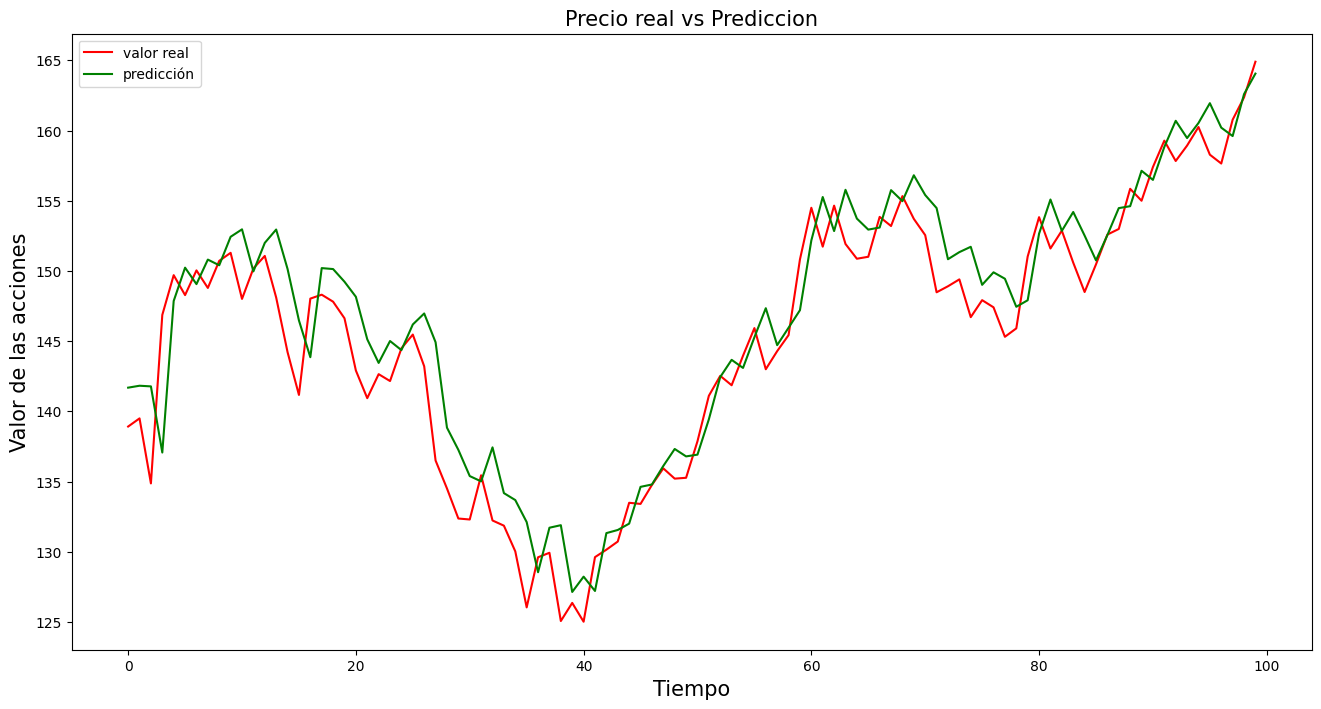

In [48]:
X_data=range(len(x_test))
Y_data=y_test
Y_data1=lstm_pred
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,'r',label='valor real')
plt.plot(X_data,Y_data1,'g',label='predicción') 
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

## LSTM 100 capas, loss=mae

In [49]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compilar
model.compile(optimizer='adam', loss='mae')
# entrenamiento
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
model.save('res/model2.keras')

Epoch 1/150


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 13.7681 - val_loss: 6.2629
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8941 - val_loss: 3.1894
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2932 - val_loss: 2.8535
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6320 - val_loss: 2.7978
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7944 - val_loss: 3.0992
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6919 - val_loss: 2.7698
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4809 - val_loss: 2.6758
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7711 - val_loss: 2.4090
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4481 - val_loss: 2.2785
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4025 - val_loss: 3.3360
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8314 - val_loss: 2.3334
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.301

In [50]:
model2 = load_model('res/model2.keras')
error = model2.evaluate(x_test, y_test, verbose=0)
print(f'MAE: {error:.3f}')

MAE: 2.772


In [52]:
model2 = load_model('res/model2.keras')
lstm_mae_pred = model2.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: {lstm_mae_pred}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted: [[136.862]
 [137.006]
 [137.297]
 [133.107]
 [143.768]
 [147.224]
 [146.062]
 [147.894]
 [147.266]
 [148.78 ]
 [149.214]
 [146.272]
 [148.223]
 [149.129]
 [146.249]
 [142.59 ]
 [139.857]
 [145.941]
 [145.956]
 [145.571]
 [144.753]
 [141.546]
 [139.411]
 [140.808]
 [140.193]
 [142.298]
 [143.4  ]
 [141.464]
 [135.25 ]
 [133.342]
 [131.02 ]
 [130.505]
 [133.25 ]
 [130.45 ]
 [130.159]
 [128.574]
 [124.818]
 [127.795]
 [128.111]
 [123.527]
 [124.737]
 [123.658]
 [127.682]
 [128.097]
 [128.955]
 [131.615]
 [131.754]
 [132.947]
 [134.15 ]
 [133.549]
 [133.548]
 [136.05 ]
 [139.065]
 [140.421]
 [140.001]
 [142.17 ]
 [144.028]
 [141.243]
 [142.448]
 [143.614]
 [148.574]
 [151.988]
 [149.748]
 [152.683]
 [150.269]
 [149.118]
 [149.059]
 [151.791]
 [150.992]
 [153.147]
 [151.779]
 [150.763]
 [146.875]
 [147.205]
 [147.394]
 [144.812]
 [145.866]
 [145.548]
 [143.519]
 [143.981]
 [148.877]
 [151.433]
 [149.472]
 [150.975]
 [148.968]
 [146.835]
 [148

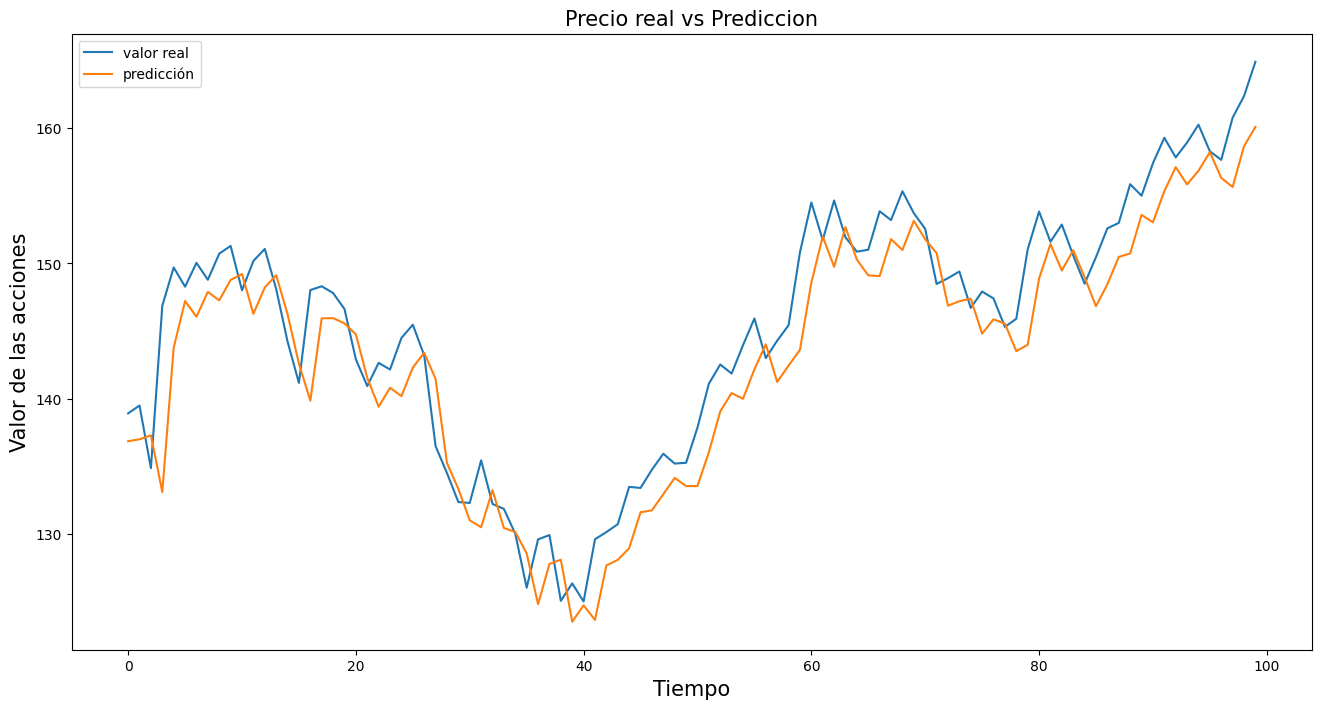

In [53]:
X_data=range(len(x_test))
Y_data=y_test
Y_data1=lstm_mae_pred
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

##  LSTM 100 capas, loss=mse, metrics=mae

In [54]:
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compilar
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
# entrenamiento
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_test, y_test))
model.save('res/model3.keras')

Epoch 1/150


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3194.3967 - mae: 29.6747 - val_loss: 17.0650 - val_mae: 3.4548
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.8565 - mae: 1.5313 - val_loss: 9.5543 - val_mae: 2.3870
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.1045 - mae: 1.2510 - val_loss: 8.8415 - val_mae: 2.3810
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2425 - mae: 1.2656 - val_loss: 8.2440 - val_mae: 2.2818
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8503 - mae: 1.2080 - val_loss: 8.3829 - val_mae: 2.2695
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3568 - mae: 1.3045 - val_loss: 9.0592 - val_mae: 2.3720
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7474 - mae: 1.2160 - val_loss: 11.0664 - val_mae: 2.6762
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6906 - mae: 1.2127 - val_loss: 9.1209 - val_mae: 2.3227
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.

In [55]:
model3 = load_model('res/model3.keras')
MSE,MAE = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE: {MSE:.3f}, RMSE: {sqrt(MSE):.3f}, MAE:{MAE:.3f}')

MSE: 7.592, RMSE: 2.755, MAE:2.117


In [56]:
es_mse_pred = model3.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: {es_mse_pred}')

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024608110F40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Predicted: [[139.334]
 [139.118]
 [139.317]
 [135.418]
 [145.871]
 [148.714]
 [147.95 ]
 [150.097]
 [150.512]
 [151.177]
 [151.455]
 [149.011]
 [150.584]
 [151.482]
 [148.855]
 [145.358]
 [142.838]

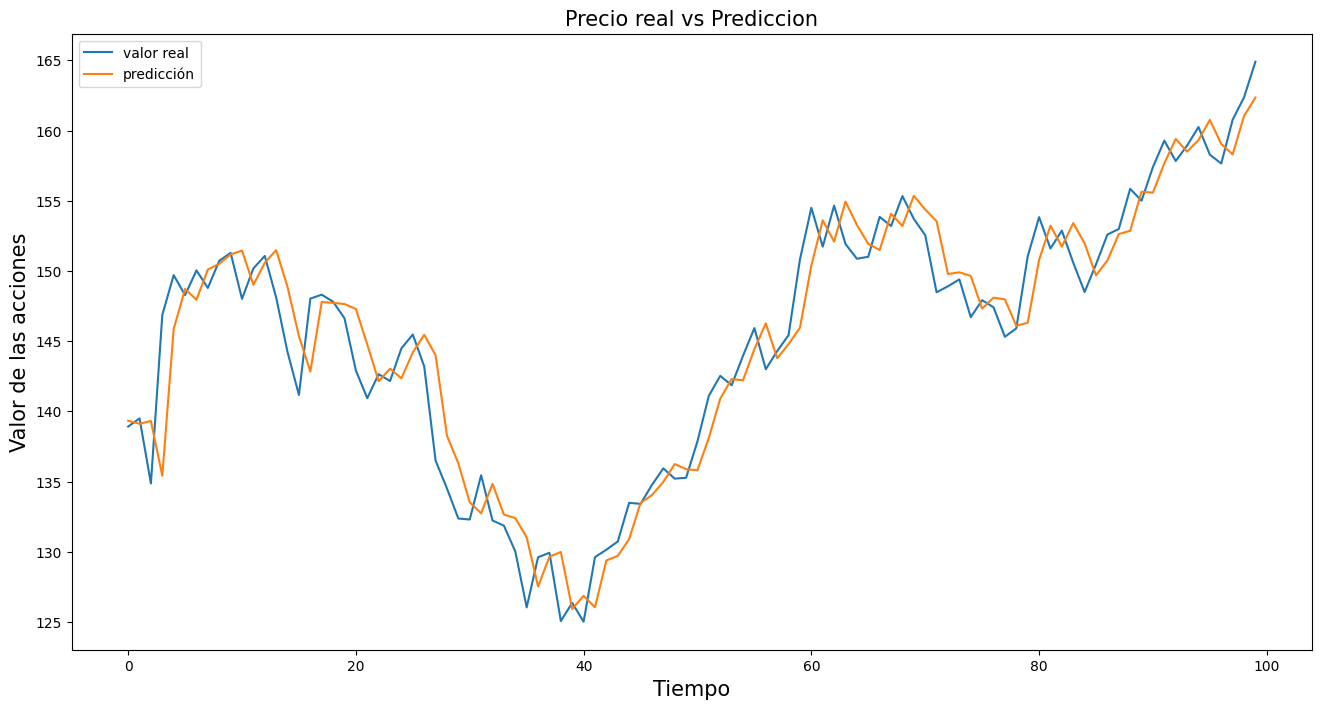

In [57]:
X_data=range(len(x_test))
Y_data=y_test
Y_data1=es_mse_pred
plt.figure(figsize=(16,8))
plt.plot(X_data,Y_data,label='valor real')
plt.plot(X_data,Y_data1,label='predicción') 
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Precio real vs Prediccion',size=15)
plt.legend(loc='best')
plt.show()

## Comparación de modelos

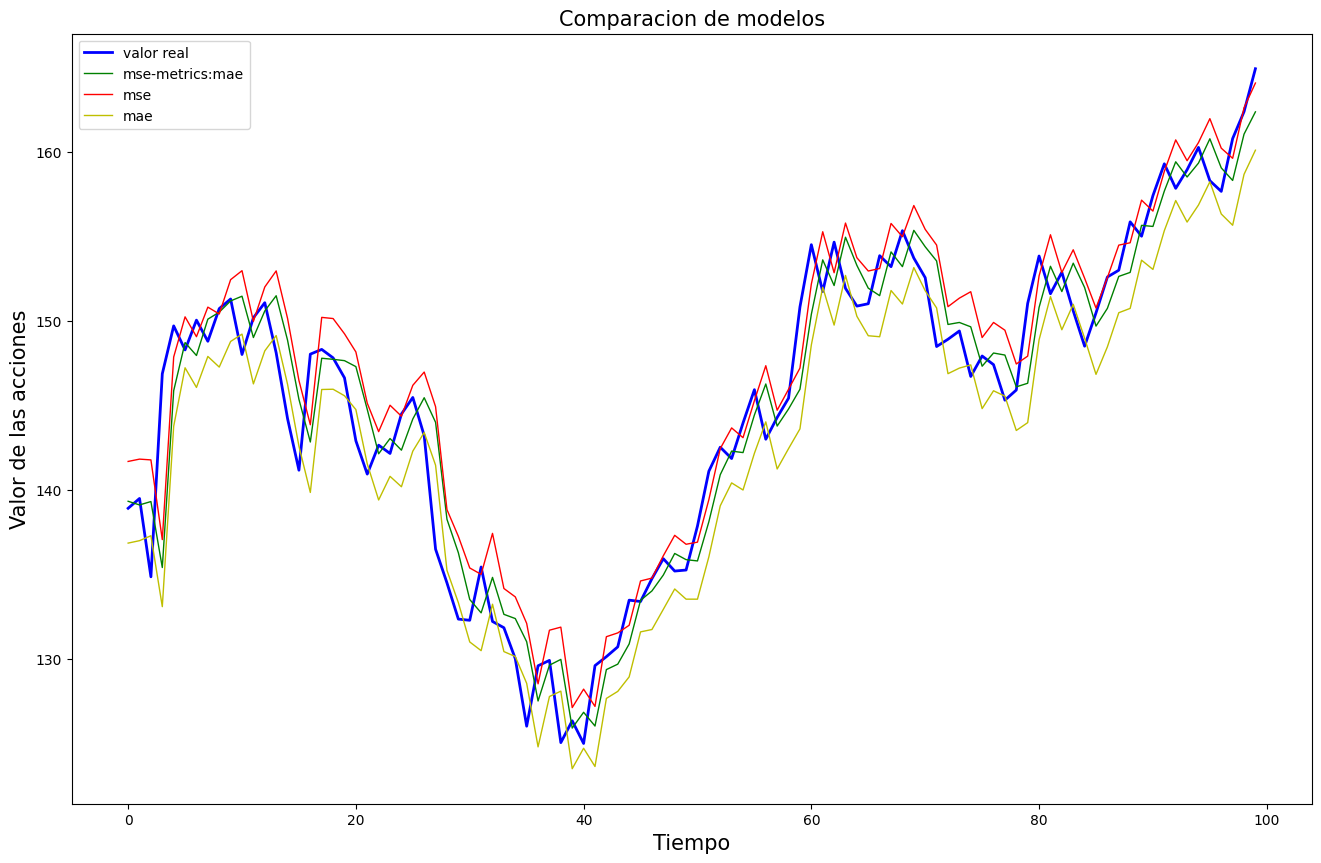

In [58]:
x_data=range(len(x_test))
y_data=y_test
y_data1=es_mse_pred
y_data2=lstm_pred
y_data3=lstm_mae_pred
plt.figure(figsize=(16,10))
plt.plot(x_data,y_data,'b',label='valor real',linewidth=2)
plt.plot(x_data,y_data1,'g',label='mse-metrics:mae',linewidth=1) 
plt.plot(x_data,y_data2,'r',label='mse',linewidth=1)
plt.plot(x_data,y_data3,'y',label='mae',linewidth=1)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Valor de las acciones',size=15)
plt.title('Comparacion de modelos',size=15)
plt.legend(loc='best')
plt.show()

## Para predecir el día 6 abril escogemos el modelo 1 que una vez entrenado y validado es el que mas se acerca a el resultado real

In [59]:
model1 = load_model('res/model1.keras')
row=asarray([160.77,162.36,164.90,166.17,165.63,163.76]).reshape((1,steps,1))
pred_abril6 = model1.predict(row)

set_printoptions(precision=3)
print(f'Valor de las acciones de Apple el dia 6 de abril : {pred_abril6}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Valor de las acciones de Apple el dia 6 de abril: [[165.584]]
